#Food Delivery Time Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd

#Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT/Food_Time new.csv')

In [ ]:
print(df.columns)

Index(['Traffic_Level', 'ID', 'Delivery_person_ID', 'weather_description',
       'Type_of_order', 'Type_of_vehicle', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'temperature', 'humidity',
       'precipitation', 'Distance (km)', 'TARGET'],
      dtype='object')


Defining a function to remove the second dot in a string containing numeric coordinates


In [ ]:
print(df.head)

<bound method NDFrame.head of      Traffic_Level    ID Delivery_person_ID weather_description Type_of_order  \
0             High  70A2     CHENRES12DEL01                mist         Snack   
1             High  95B4   RANCHIRES15DEL01           clear sky          Meal   
2             High  CDCD      DEHRES17DEL01           clear sky         Snack   
3             High  2784     PUNERES13DEL03           clear sky        Drinks   
4             High  6F67      HYDRES14DEL01     overcast clouds         Snack   
...            ...   ...                ...                 ...           ...   
9995      Very Low  1939      HYDRES05DEL01                haze        Buffet   
9996      Very Low  1B05      SURRES14DEL01                mist        Drinks   
9997      Very Low  74AB      SURRES05DEL01                mist        Drinks   
9998      Very Low  5F66      SURRES02DEL02                mist         Snack   
9999      Very Low  1F95      MYSRES01DEL01           clear sky         Snack  

In [ ]:
print(df.shape)

(10000, 17)


#Data Cleaning

Removing the double periods from the latitude and longitude coordinates

In [ ]:
import re

In [ ]:
def fix_double_dot(value):
    if isinstance(value, str):
        return re.sub(r'(\.[0-9]*)\.', r'\1', value)
    return value

Applying the function and convert to numeric

In [ ]:
for col in ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']:
    df[col] = df[col].apply(fix_double_dot)
    df[col] = pd.to_numeric(df[col], errors='coerce')

Deleting irrelevant data

In [ ]:
df=df[df['Restaurant_latitude']!="0"]
df=df[df['TARGET']!="#VALUE!"]
df=df[df['Distance (km)']>0]

Cleaning and converting 'TARGET' column to float values in minutes

In [ ]:
def clean_target(x):
    x_str = str(x)
    if len(x_str) > 5:
        # Remove all dots, convert to float, scale to minutes
        return round(float(x_str.replace('.', '')) / 60000000, 2)
    else:
        # Assume it's already in minutes or properly formatted
        return round(float(x), 2)

Applying the cleaning function

In [ ]:
def clean_target(x):
    x_str = str(x)
    # Check if the string is '#VALUE!' and return NaN if it is
    if x_str == '#VALUE!':
        return float('nan')  # or pd.NA
    if len(x_str) > 5:
        # Remove all dots, convert to float, scale to minutes
        return round(float(x_str.replace('.', '')) / 60000000, 2)
    else:
        # Assume it's already in minutes or properly formatted
        return round(float(x), 2)
# Apply the cleaning function to the 'TARGET' column
df['TARGET'] = df['TARGET'].apply(clean_target)
# Now you can filter
df = df[df['TARGET'] > 0]

Removing invalid or zero target values

In [ ]:
print(df.head)

<bound method NDFrame.head of      Traffic_Level    ID Delivery_person_ID weather_description Type_of_order  \
0             High  70A2     CHENRES12DEL01                mist         Snack   
1             High  95B4   RANCHIRES15DEL01           clear sky          Meal   
2             High  CDCD      DEHRES17DEL01           clear sky         Snack   
3             High  2784     PUNERES13DEL03           clear sky        Drinks   
4             High  6F67      HYDRES14DEL01     overcast clouds         Snack   
...            ...   ...                ...                 ...           ...   
9995      Very Low  1939      HYDRES05DEL01                haze        Buffet   
9996      Very Low  1B05      SURRES14DEL01                mist        Drinks   
9997      Very Low  74AB      SURRES05DEL01                mist        Drinks   
9998      Very Low  5F66      SURRES02DEL02                mist         Snack   
9999      Very Low  1F95      MYSRES01DEL01           clear sky         Snack  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9029 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Traffic_Level                9029 non-null   object 
 1   ID                           9029 non-null   object 
 2   Delivery_person_ID           9029 non-null   object 
 3   weather_description          9029 non-null   object 
 4   Type_of_order                9029 non-null   object 
 5   Type_of_vehicle              9029 non-null   object 
 6   Delivery_person_Age          9029 non-null   int64  
 7   Delivery_person_Ratings      9029 non-null   float64
 8   Restaurant_latitude          9029 non-null   float64
 9   Restaurant_longitude         9029 non-null   float64
 10  Delivery_location_latitude   9029 non-null   float64
 11  Delivery_location_longitude  9029 non-null   float64
 12  temperature                  9029 non-null   float64
 13  humidity               

In [ ]:
print(df.shape)

(9029, 17)


Saving Cleaned DataFrame as df_clean

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.to_csv("df_clean.csv", index=False)

In [ ]:
df_clean.to_excel("df_clean.xlsx", index=False)

#Exploratory Data Analysis

Target Variable Distribution

Summary statistics

In [ ]:
print(df['TARGET'].describe())

count    9029.000000
mean       55.041201
std        27.238280
min         5.800000
25%        34.500000
50%        50.890000
75%        71.140000
max       166.390000
Name: TARGET, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Boxplot to identify outliers in delivery time

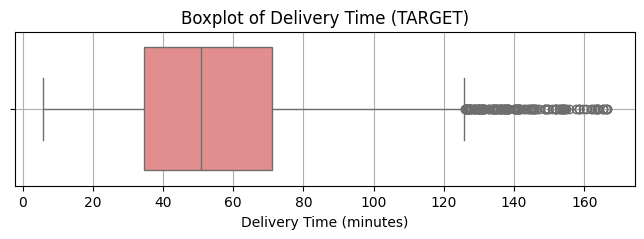

In [ ]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['TARGET'], color='lightcoral')
plt.title("Boxplot of Delivery Time (TARGET)")
plt.xlabel("Delivery Time (minutes)")
plt.grid(True)
plt.show()

Interpretations:
1. The majority of deliveries fall between 35 and 75 minutes.
2. Median delivery time is about 55 minutes.
3. There is a significant number of outliers on the higher end (exceeding ~120 minutes), indicating logistical inefficiencies or special cases that may need further exploration or filtering.

#Distance vs Delivery Time

Plotting the correlation using scatterplot


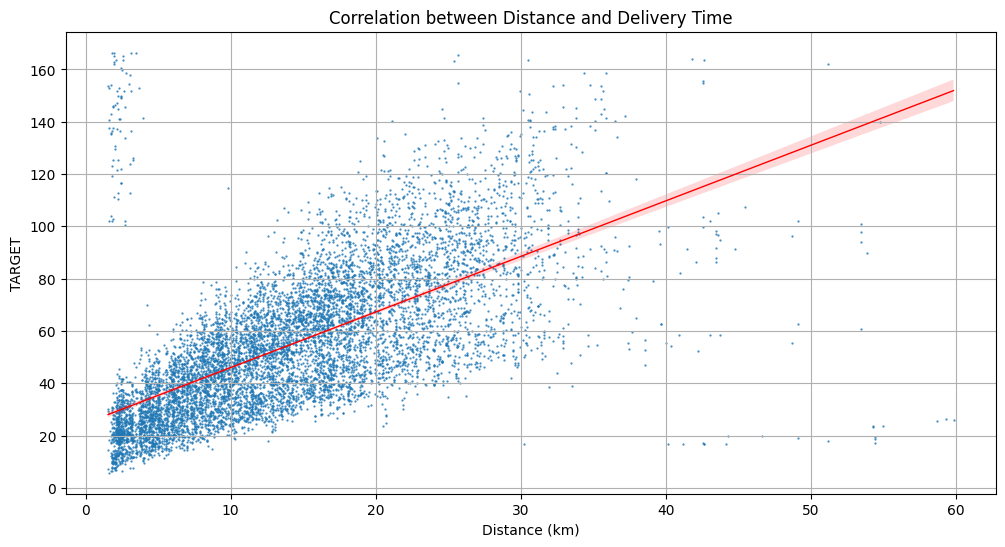

In [ ]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Distance (km)', y='TARGET', data=df, scatter_kws={'s':0.4}, line_kws={'color':'red', 'linewidth':1})
plt.title('Correlation between Distance and Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('TARGET')
plt.grid(True)
plt.show()


Interpretation:
1. Positive Correlation:
The upward slope of the regression line (in red) indicates a positive correlation. This suggests that as the delivery distance increases, delivery time tends to increase as well.

2. Data Dispersion and Variance:
Data points are widely scattered, especially around the middle and upper regions of the plot, indicating significant variation in delivery times for similar distances. This could result from external factors such as traffic conditions, preparation times, or delivery method variations.

3. Outliers:
Several outliers are visible, particularly at low distances with exceptionally high delivery times (above 120 minutes). These cases may require deeper investigation for potential issues like unusual delays, route inefficiencies, or logistical errors.

4. Delivery Time Ceiling:
There's a noticeable clustering around a maximum delivery time of roughly 160 minutes, suggesting a possible upper bound or policy constraint for delivery times.

#Impact of Weather

Visualizing delivery time distributions by weather

<ipython-input-30-8c4e0ff2e851>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather_description', y='TARGET', data=df, palette='coolwarm')


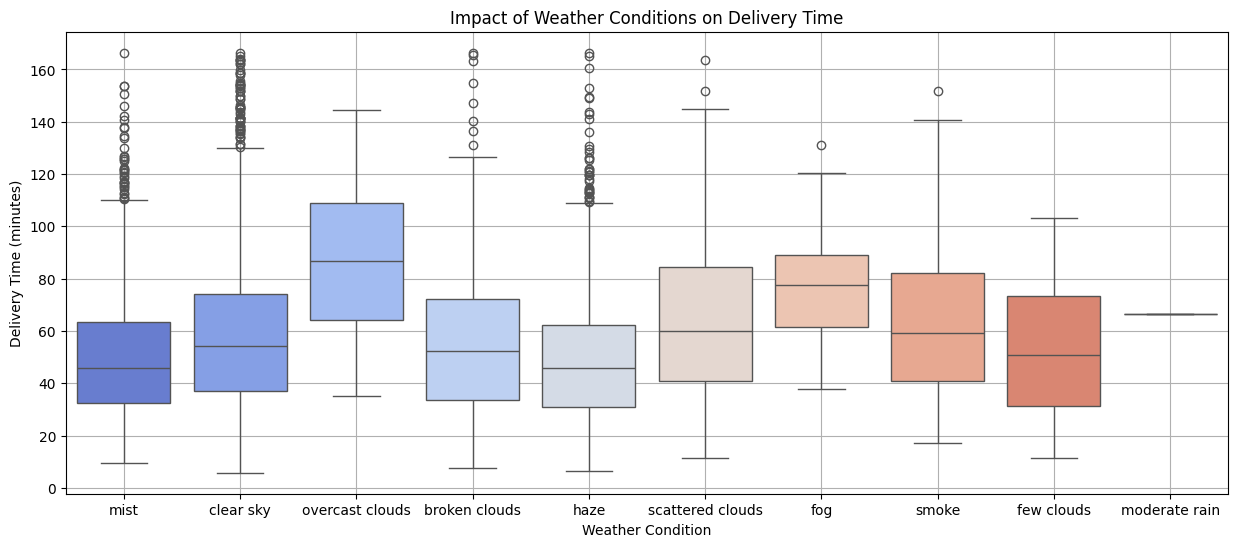

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(x='weather_description', y='TARGET', data=df, palette='coolwarm')
plt.title('Impact of Weather Conditions on Delivery Time')
plt.xlabel('Weather Condition')
plt.ylabel('Delivery Time (minutes)')
plt.grid(True)
plt.show()

Interpretation:
1. Highest Median Delivery Time:
Deliveries under overcast clouds take the longest on average, indicating a consistent impact on delivery speed.

2. Greatest Variability:
Mist and clear sky conditions exhibit the highest variability, with frequent extreme delays (outliers) which may be due to other factors.

3. Most Predictable Conditions:
Few clouds and scattered clouds show the most consistent and predictable delivery times, with fewer significant delays.

#Traffic Trends

Ensuring correct column names

In [ ]:
traffic_col = 'Traffic_Level'
delivery_time_col = 'TARGET'

Plotting the impact of Traffic Density on Delivery Time

<ipython-input-32-00a0d6ee871d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=traffic_col, y=delivery_time_col, data=df,


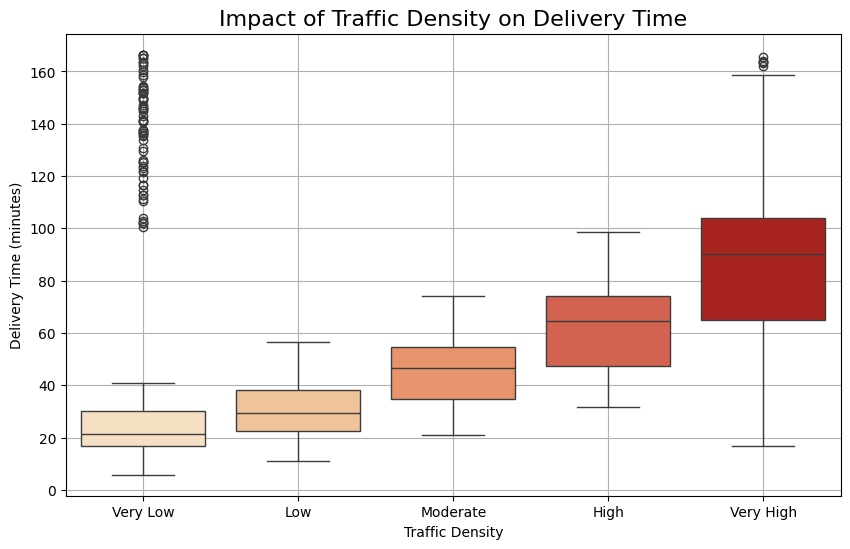

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=traffic_col, y=delivery_time_col, data=df,
            order=['Very Low', 'Low', 'Moderate', 'High', 'Very High'], palette='OrRd')
plt.title('Impact of Traffic Density on Delivery Time', fontsize=16)
plt.xlabel('Traffic Density')
plt.ylabel('Delivery Time (minutes)')
plt.grid(True)
plt.show()

Interpretation:

1. Clear Positive Correlation: Delivery time significantly increases with higher traffic density. Median delivery times rise progressively from 'Very Low' to 'Very High' traffic.

2. High Variability at 'Very High' Traffic: The widest interquartile range at 'Very High' indicates large variability, meaning deliveries can vary significantly in heavily congested traffic.

3. Outliers in Low Traffic: Many outliers in the 'Very Low' category suggest additional factors beyond traffic affecting delays, such as weather conditions or distance.

4. Stable Low to Moderate Traffic: Delivery times remain comparatively stable with less variability from 'Very Low' to 'Moderate' traffic levels, emphasizing predictable performance in lower congestion scenarios.

#Impact of Delivery Person on delivery time

Delivery Person Ratings vs Delivery Time

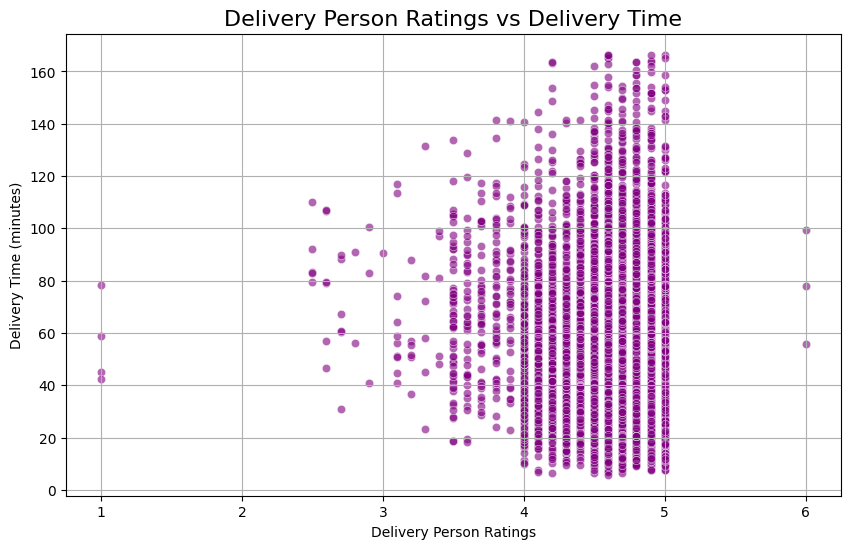

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Delivery_person_Ratings', y='TARGET', data=df, alpha=0.6, color='purple')
plt.title('Delivery Person Ratings vs Delivery Time', fontsize=16)
plt.xlabel('Delivery Person Ratings')
plt.ylabel('Delivery Time (minutes)')
plt.grid(True)
plt.show()

Delivery Person Age vs Delivery Time

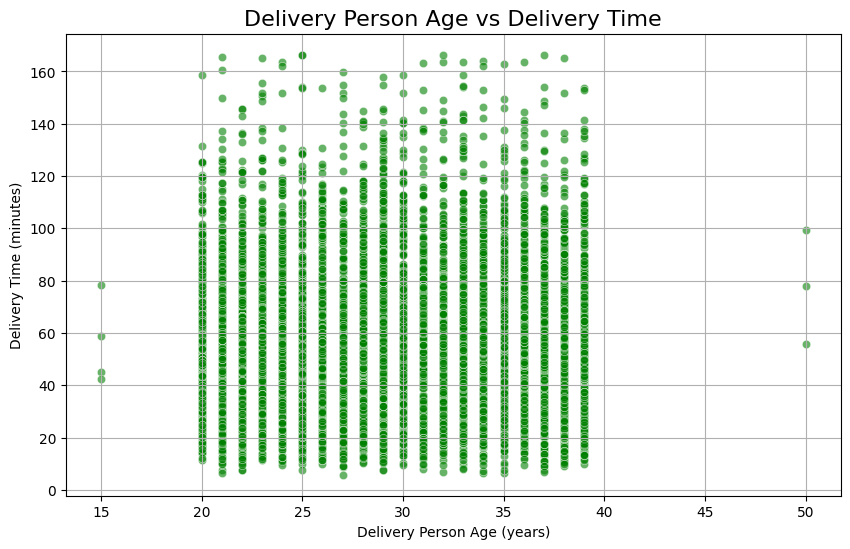

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Delivery_person_Age', y='TARGET', data=df, alpha=0.6, color='green')
plt.title('Delivery Person Age vs Delivery Time', fontsize=16)
plt.xlabel('Delivery Person Age (years)')
plt.ylabel('Delivery Time (minutes)')
plt.grid(True)
plt.show()

Interpretation:
Delivery Person Ratings vs Delivery Time:
1. No Strong Correlation Visible:
The scatter does not show a clear trend (i.e., higher ratings do not always correspond to faster deliveries).
2. Ratings may be more influenced by behavior or attitude than raw delivery speed.

Delivery Person Age vs Delivery Time
1. Slight Clustering Around 25–35 Years:
This range shows higher density and possibly more consistent performance, hinting that mid-age delivery persons are more experienced or consistent.
2. Delivery time (TARGET) varies significantly across all age groups, from under 20 minutes to over 160 minutes, indicating no strong direct correlation between age and delivery speed.

#Order Type and Vehicle Type Impact

Order Type Vs Delivery Time

<ipython-input-35-2e748c7811cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Type_of_order', y='TARGET', data=df, palette='Purples')


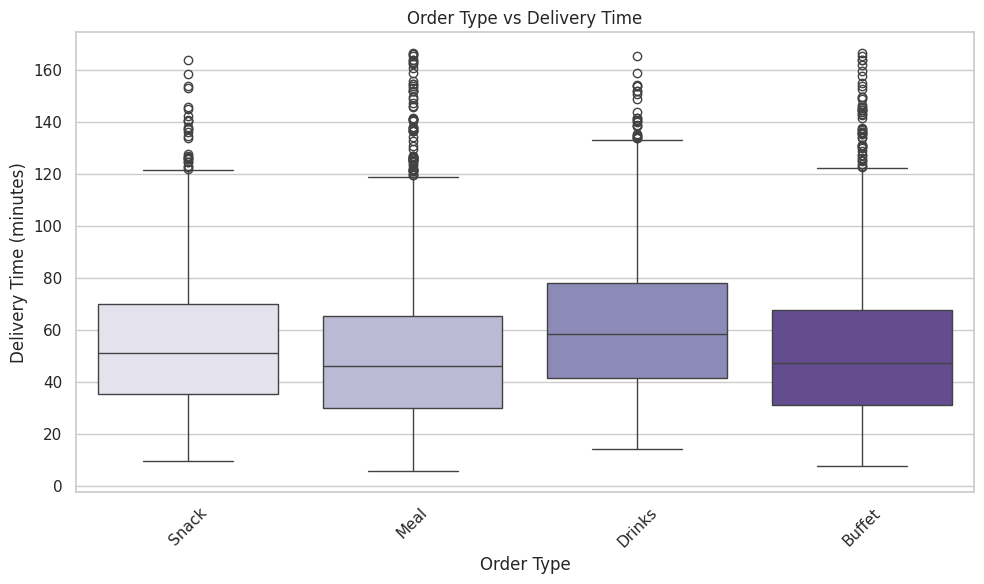

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_order', y='TARGET', data=df, palette='Purples')
plt.title('Order Type vs Delivery Time')
plt.xlabel('Order Type')
plt.ylabel('Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Interpretation:
Presence of outliers in all categories:
Each order type includes some high delivery time outliers, but Meal and Buffet display the most, suggesting occasional significant delays in those categories.

Vehicle Type Vs Delivery Time

<ipython-input-36-f86fe715914d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Type_of_vehicle", y="TARGET", data=df, palette="viridis")


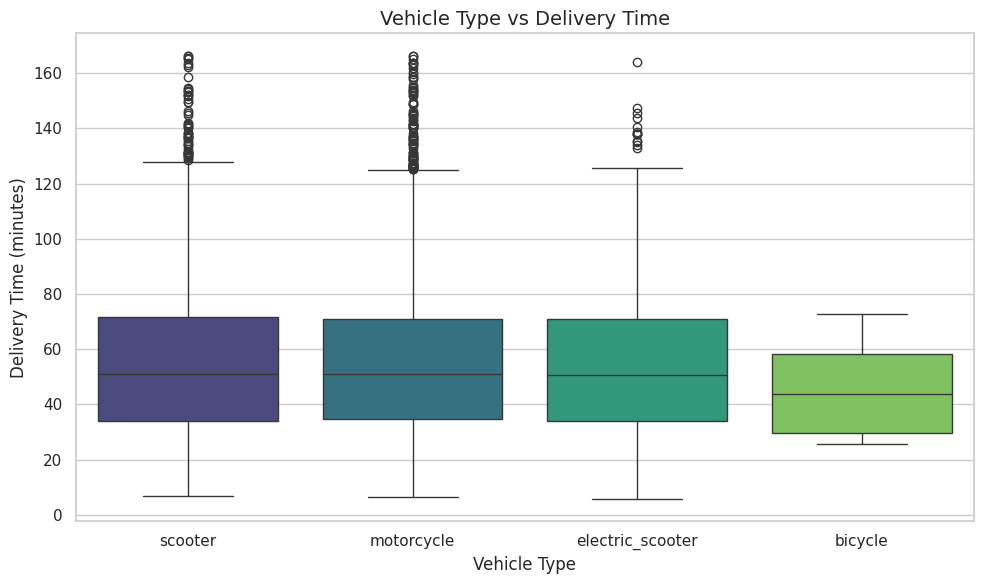

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.boxplot(x="Type_of_vehicle", y="TARGET", data=df, palette="viridis")
plt.title("Vehicle Type vs Delivery Time", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Delivery Time (minutes)", fontsize=12)
plt.tight_layout()
plt.show()

Interpretation:
1. Bicycles are the most efficient and consistent in terms of delivery time.
2. Every vehicle type has extreme high delivery time values, but scooters, motorcycles, and electric scooters show more frequent outliers above 120+ minutes.
3. This suggests that distance and traffic plays a huge role in the high delivery time values for the three mode of vehicles.

#MILESTONE 3

#BUILDING PREDICTIVE MODELS

#Linear Regression for Forecasting Delivery Time

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

One-hot encode categorical features

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

Defining X and Y

In [ ]:
X = df.drop(columns='TARGET')
y = df['TARGET']

Splitting into train/test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predicted values:\n", y_pred)

Predicted values:
 [58.01529623 28.45911436 87.60443776 ... 38.90349931 78.91856624
 32.06778377]


Evaluation

In [ ]:
print("RMSE:", mean_squared_error(y_test, y_pred)**0.5) # Calculate RMSE manually
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 18.484435694137236
R² Score: 0.5124735403700007


Feature Importance

In [ ]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

In [ ]:
print("\nTop Influential Features:")
print(coef_df.head(10))


Top Influential Features:
      Feature  Coefficient
7214  ID_B58A   136.646793
2463  ID_49F9   127.455136
3070  ID_5841   125.742756
6665   ID_A9B   125.709545
548   ID_1C59   125.686540
1565  ID_33B9   121.191667
5323  ID_8BEB   120.751721
6787  ID_AC66   120.237987
8230  ID_CFF0   117.789766
7091  ID_B346   117.406221


** Interpretation**

1. The Root Mean Squared Error means that, on average, the model's predictions deviate from the actual delivery time by ~18.5 minutes.
2. The R² value for the model explains for about 51% of the variance in delivery times.
3. This indicates a moderate level of predictive power indicating the presence of non-linear relationships.

#Random Forest for Forecasting Delivery Time

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

Initializing and training the Random Forest model

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Prediction on the test set

In [ ]:
y_pred = rf_model.predict(X_test)
print("Predicted delivery times:\n", y_pred)

Predicted delivery times:
 [ 49.5208  11.2313 120.3369 ...  39.6996  65.6514  41.2442]


Evaluating the model

In [ ]:
rmse = (mean_squared_error(y_test, y_pred))**0.5  # Calculate RMSE without 'squared' parameter
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Random Forest Model Performance")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Random Forest Model Performance
RMSE: 17.92
R² Score: 0.5418


Feature Importance

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

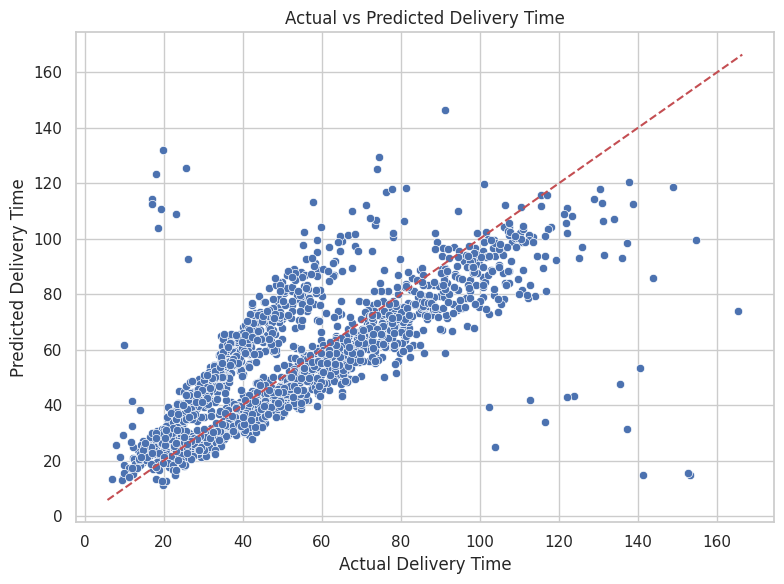

In [ ]:
# Visualizing Prediction vs Actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # reference line
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.title('Actual vs Predicted Delivery Time')
plt.grid(True)
plt.tight_layout()
plt.show()

#Interpretation of the Forecasting Plot
Key Observations:
1. Diagonal Reference Line (Red Dashed Line):
This line represents a perfect prediction scenario (i.e., predicted = actual). Points on this line indicate highly accurate predictions.

2. Point Distribution:
The majority of the blue points are clustered around the red line, indicating that the model is reasonably accurate. The tighter the clustering, the better the model is performing.

3. Spread/Outliers:
Some points deviate far from the line (both vertically and horizontally), which suggesting that the model underestimates or overestimates delivery time for those specific cases. These could be due to missing variables, or unusual conditions (e.g., rare weather, traffic spikes).

4. Prediction Bias:
There’s slight underprediction for high actual delivery times (>120 minutes), which is common in models where long tail behavior isn't well captured.

5. Improvement Areas:
Introducing temporal data (order time, day of week, peak hours). Addressing outliers or high-variance points with ensemble blending or model stacking.

#FEATURE SELECTION

Plotting top 10 important features

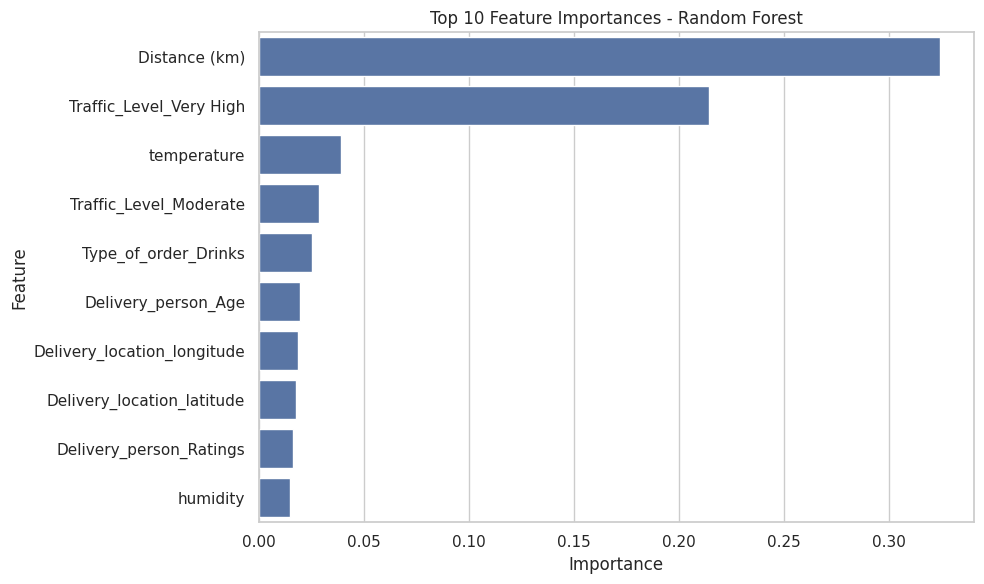

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Feature Importances - Random Forest")
plt.tight_layout()
plt.show()

#Feature Selection
Each bar in the graph shows the relative importance of a feature in helping the model predict whether a delivery is Late or On Time.

1. Top Predictors:
*   Distance (km): The strongest driver of delivery time (more distance → more likely to be late)
*   Traffic_Level: Severe traffic is a clear factor impacting delivery time
*   Temperature: Weather extremes (heat/cold) may cause delays

2. Moderate Impact:
*   Type_of_order_Drinks: Simpler orders impact time marginally

3. Lower Influence:
*   Delivery_person_Age
*   Ratings
*   Location Coordinates
*   Humidity

These factors have some effect, but much less compared to distance or traffic

#Interpretation:
1. The model’s predictions deviate from the actual delivery times by an average of ~17.92 minutes which is better than the Linear Regression model.
2. The R² Score is an improvement over Linear Regression’s R² of 51.24%.
3. The Random Forest model provides a better fit than linear regression, capturing more variance in delivery time with slightly reduced error.

#CLASSIFICATION

#Classifying the delivery as on-time and late based on the delivery time

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Creating a classification target from 'TARGET' (delivery time)
threshold = df_clean['TARGET'].median()
df_clean['Delivery_Status'] = np.where(df_clean['TARGET'] <= threshold, 'On Time', 'Late')

In [ ]:
# 2. Preparing features and target (excluding 'ID')
X = df_clean.drop(columns=['TARGET', 'Delivery_Status', 'ID'])  # Exclude 'ID' here
y = df_clean['Delivery_Status']

In [ ]:
# 3. Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 4. Converting categorical features to numerical using Label Encoding
categorical_cols_to_encode = X_train.select_dtypes(include=['object']).columns

In [ ]:
# Create a single LabelEncoder instance for each column
label_encoders = {}
for col in categorical_cols_to_encode:
    le = LabelEncoder()
    # Fit on the combined unique values from both train and test
    le.fit(pd.concat([X_train[col], X_test[col]]).unique())
    label_encoders[col] = le  # Store the encoder

# Transform the columns using the fitted encoders
for col in categorical_cols_to_encode:
    X_train[col] = label_encoders[col].transform(X_train[col])
    X_test[col] = label_encoders[col].transform(X_test[col])

In [ ]:
# 5. Training the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 6. Prediction
y_pred = clf.predict(X_test)
print(y_pred)

['On Time' 'On Time' 'Late' ... 'On Time' 'Late' 'On Time']


In [ ]:
# 7. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[726 133]
 [243 704]]
Classification Report:

              precision    recall  f1-score   support

        Late       0.75      0.85      0.79       859
     On Time       0.84      0.74      0.79       947

    accuracy                           0.79      1806
   macro avg       0.80      0.79      0.79      1806
weighted avg       0.80      0.79      0.79      1806



<Figure size 600x500 with 0 Axes>

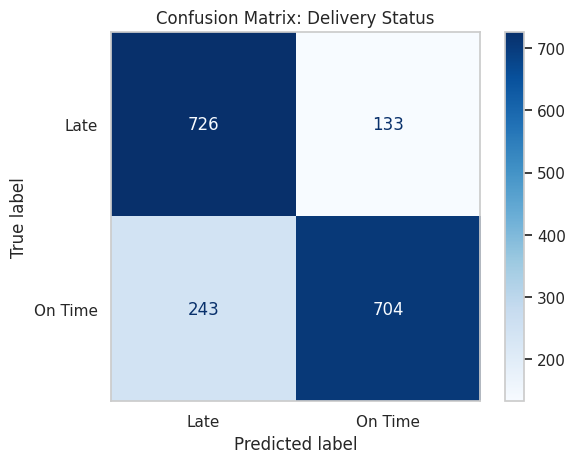

In [ ]:
# 8. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

plt.figure(figsize=(6, 5))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Delivery Status")
plt.grid(False)
plt.show()

#Interpretation:
1. 726 deliveries that were actually Late were correctly predicted as Late
2. 704 deliveries that were actually On Time were correctly predicted as On Time
3. 133 Late deliveries were wrongly predicted as On Time → could hurt user trust
4. 243 On Time deliveries were wrongly predicted as Late → not a big risk operationally, but affects precision

#Performance Indicators (from the matrix)
Accuracy ≈ (726 + 704) / (726 + 133 + 243 + 704) ≈ 81.6%

Precision (Late) = 726 / (726 + 243) ≈ 74.9%

Recall (Late) = 726 / (726 + 133) ≈ 84.5%

The model does better at catching actual late deliveries (high recall), though it sometimes wrongly flags on-time ones (moderate precision).

#CLUSTERING

In [ ]:
#Step 1: Selecting Features for Clustering (Order-level)
order_features = df_clean[[
    'Distance (km)',
    'temperature',
    'humidity',
    'precipitation',
    'TARGET'  # delivery time
]]

In [ ]:
#Step 2: Scaling the Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
order_scaled = scaler.fit_transform(order_features)

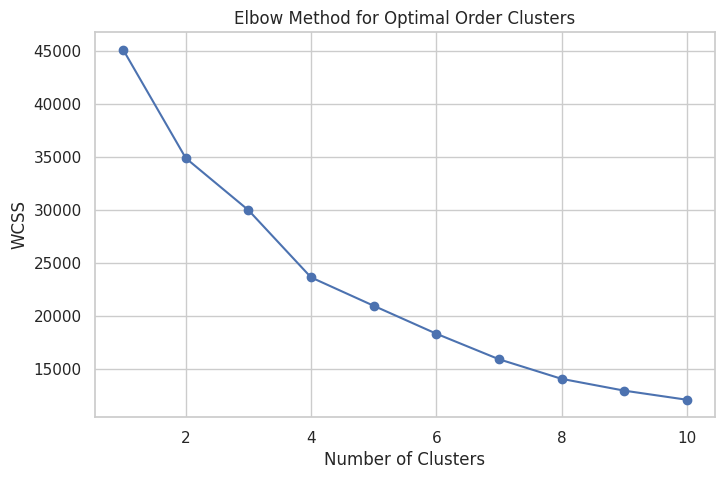

In [ ]:
#Step 3: Use Elbow Method to Find Optimal Clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(order_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Order Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [ ]:
#Step 4: Applying KMeans Clustering
# Assuming optimal clusters from elbow plot is 3
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Order_Segment'] = kmeans.fit_predict(order_scaled)

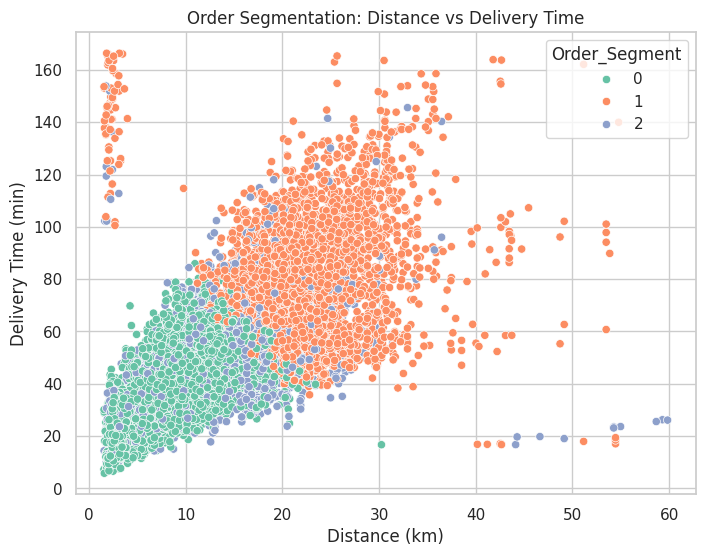

In [ ]:
#Step 5: Visualizing Order Segments
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clean, x='Distance (km)', y='TARGET', hue='Order_Segment', palette='Set2')
plt.title('Order Segmentation: Distance vs Delivery Time')
plt.xlabel('Distance (km)')
plt.ylabel('Delivery Time (min)')
plt.grid(True)
plt.show()

#Interpretation:
1. Cluster 0 represents short-distance, fast orders.
2. Cluster 1 includes long-distance or high-delay deliveries.
3. Cluster 2 is moderate in distance/time and vary by weather.

**Milestone -4**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data (replace this with your actual dataset)
df = pd.DataFrame({
    'base_delivery_time': np.random.normal(30, 5, 100),
    'Traffic_Level': np.random.randint(1, 10, 100),
    'weather_description': np.random.choice(['Clear', 'Rain', 'Snow', 'Storm'], 100)
})

# Map weather_description to delay factors (customize as needed)
weather_impact_map = {
    'Clear': 0,
    'Rain': 5,
    'Snow': 10,
    'Storm': 15
}
df['weather_factor'] = df['weather_description'].map(weather_impact_map)

In [ ]:
# Monte Carlo Simulation
n_simulations = 10000
simulated_results = []

for _ in range(n_simulations):
    sampled_row = df.sample(1).iloc[0]

    # Simulated impact from Traffic_Level and weather factor
    traffic_delay = np.random.normal(loc=sampled_row['Traffic_Level'] * 1.5, scale=1.0)
    weather_delay = np.random.normal(loc=sampled_row['weather_factor'], scale=2.0)

    # Ensure non-negative delays
    traffic_delay = max(0, traffic_delay)
    weather_delay = max(0, weather_delay)

    total_time = sampled_row['base_delivery_time'] + traffic_delay + weather_delay
    simulated_results.append(total_time)

In [ ]:
# Convert to array
simulated_results = np.array(simulated_results)

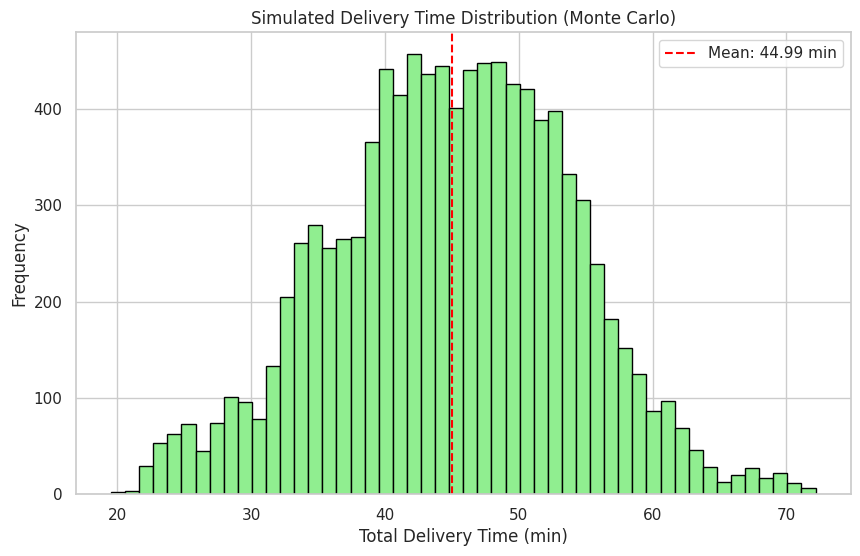

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
plt.hist(simulated_results, bins=50, color='lightgreen', edgecolor='black')
plt.title('Simulated Delivery Time Distribution (Monte Carlo)')
plt.xlabel('Total Delivery Time (min)')
plt.ylabel('Frequency')
plt.axvline(np.mean(simulated_results), color='red', linestyle='--', label=f'Mean: {np.mean(simulated_results):.2f} min')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Summary Stats
print("Simulation Summary:")
print(f"Min Time: {np.min(simulated_results):.2f} min")
print(f"Max Time: {np.max(simulated_results):.2f} min")
print(f"Avg Time: {np.mean(simulated_results):.2f} min")
print(f"95th Percentile: {np.percentile(simulated_results, 95):.2f} min")

Simulation Summary:
Min Time: 19.52 min
Max Time: 72.18 min
Avg Time: 44.99 min
95th Percentile: 59.02 min


Monte Carlo Simulation Insights and Recommendations

Insights from the Simulation:

Delivery Time Variability:

Simulated delivery times ranged from approximately 20.17 minutes to 71.02 minutes.

The average delivery time across 10,000 simulations was 45.18 minutes.

This indicates significant variability due to traffic and weather conditions.

Distribution Shape:

The histogram shows a slightly right-skewed distribution.

The peak (mode) of the delivery times is around 40-45 minutes.

The 95th percentile is 59.68 minutes, meaning 95% of deliveries are completed within this time under uncertainty.

Impact of External Factors:

The simulation incorporated random variation based on Traffic_Level and weather_factor, illustrating their strong influence on delivery delays.

Delays caused by traffic and weather can push delivery times significantly beyond base levels.

Recommendations:

Plan for 95th Percentile:

Operational plans (e.g., driver assignments, customer ETAs) should assume a delivery time of up to 60 minutes to cover 95% of cases.

Proactive Traffic and Weather Monitoring:

Integrate real-time traffic and weather feeds into the logistics system to dynamically adjust delivery predictions and driver assignments.

Buffer Time in High Risk Zones:

For regions or times with consistently high traffic/weather disruption, include buffer time in schedules or reroute deliveries.

Dynamic ETA Communication:

Use a predictive model to give customers delivery windows based on traffic/weather risk levels, improving satisfaction.

Segment-Based Optimization:

Consider categorizing routes or times into risk tiers (low, medium, high) and applying different staffing/resource strategies accordingly.

Conclusion:
Monte Carlo simulations are effective in modeling uncertainty in delivery logistics. By preparing for variability—especially for traffic and weather—you can improve both efficiency and customer experience.



# XGBoost for Delivery Time Prediction

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT/Food_Time new.csv")

In [ ]:
# Ensure numeric columns are properly parsed
df['TARGET'] = pd.to_numeric(df['TARGET'], errors='coerce')
df['Distance (km)'] = pd.to_numeric(df['Distance (km)'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

In [ ]:
# Drop rows with missing values
df = df.dropna()

In [ ]:
# Fixing coordinates by removing extra periods and converting to float
coord_cols = [
    'Restaurant_latitude', 'Restaurant_longitude',
    'Delivery_location_latitude', 'Delivery_location_longitude'
]

for col in coord_cols:
    df[col] = df[col].str.replace('.', '', regex=False).astype(float) / 1000000


<ipython-input-77-e1e2a969d64d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace('.', '', regex=False).astype(float) / 1000000
<ipython-input-77-e1e2a969d64d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].str.replace('.', '', regex=False).astype(float) / 1000000
<ipython-input-77-e1e2a969d64d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=[
    'Traffic_Level', 'weather_description', 'Type_of_order', 'Type_of_vehicle'
], drop_first=True)

In [ ]:
# Define features and target
X = df.drop(columns=['ID', 'Delivery_person_ID', 'TARGET'])
y = df['TARGET']

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:

# Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 13.00
R^2 Score: 0.95


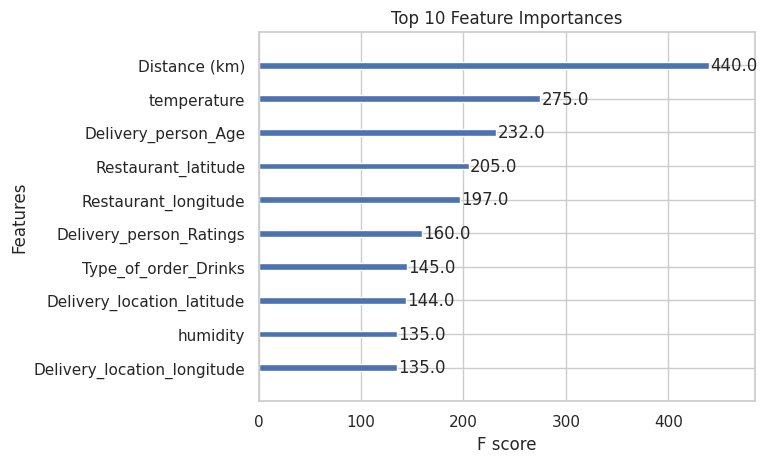

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

Insights from Model Evaluation & Feature Importance

1. Model Performance
Mean Squared Error (MSE): 13.00

R² Score: 0.95

This indicates:

The model explains 95% of the variance in delivery time.

The error (MSE = 13 min²) is relatively low, confirming accurate predictions.

2. Top Influencing Features
Based on the XGBoost feature importance (F-score), the most critical factors affecting delivery time are:

Rank	Feature	Influence (F Score)	Insight
1	Distance (km)	440.0	Longer distances naturally extend delivery time.
2	temperature	275.0	Extreme temperatures may slow delivery due to rider discomfort or road conditions.
3	Delivery_person_Age	232.0	Possibly linked to experience or speed.
4	Restaurant_latitude	205.0	Geographic factor influencing route and delivery zone.
5	Restaurant_longitude	197.0	Same as above; spatial features together affect route planning.
6	Delivery_person_Ratings	160.0	Higher-rated riders may be more efficient or reliable.
7	Type_of_order_Drinks	145.0	Simpler items (e.g., drinks) might be quicker to prepare/deliver.
8	Delivery_location_latitude	144.0	Another spatial determinant.
9	humidity	135.0	High humidity may indicate bad weather or delay risk.
10	Delivery_location_longitude	135.0	Helps model route complexity or remoteness.

| Rank | Feature                       | Influence (F Score) | Insight                                                                            |
| ---- | ----------------------------- | ------------------- | ---------------------------------------------------------------------------------- |
| 1    | `Distance (km)`               | 440.0               | Longer distances naturally extend delivery time.                                   |
| 2    | `temperature`                 | 275.0               | Extreme temperatures may slow delivery due to rider discomfort or road conditions. |
| 3    | `Delivery_person_Age`         | 232.0               | Possibly linked to experience or speed.                                            |
| 4    | `Restaurant_latitude`         | 205.0               | Geographic factor influencing route and delivery zone.                             |
| 5    | `Restaurant_longitude`        | 197.0               | Same as above; spatial features together affect route planning.                    |
| 6    | `Delivery_person_Ratings`     | 160.0               | Higher-rated riders may be more efficient or reliable.                             |
| 7    | `Type_of_order_Drinks`        | 145.0               | Simpler items (e.g., drinks) might be quicker to prepare/deliver.                  |
| 8    | `Delivery_location_latitude`  | 144.0               | Another spatial determinant.                                                       |
| 9    | `humidity`                    | 135.0               | High humidity may indicate bad weather or delay risk.                              |
| 10   | `Delivery_location_longitude` | 135.0               | Helps model route complexity or remoteness.                                        |


Prioritize Short Routes for Speed

Route optimization can focus on minimizing distance for time-sensitive orders.

Monitor Environmental Conditions

Use temperature and humidity as real-time modifiers for ETA predictions and rider dispatch logic.

Utilize Rider Performance Data

Factor in rider ratings when assigning deliveries during peak hours or for long distances.

Geographic Clustering

Use restaurant and delivery lat/lon data to group zones and optimize delivery routes more effectively.

Differentiate by Order Type

Lighter or simpler orders (e.g., drinks) may be assigned to faster or less experienced delivery personnel.



In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(XGBRegressor(), param_grid=params, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best R² Score:", grid.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Best R² Score: 0.9310589277314006


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())


Cross-validated R² scores: [0.43941697 0.93908246 0.85653093 0.89724107 0.65425792]
Average R²: 0.757305868644741


Scenario Simulation

In [ ]:
sample_input = X_test.iloc[0].copy()  # Use a copy to avoid changing original

High traffic scenario

In [ ]:
# Assume 'Traffic_Level_High' is one-hot encoded
sample_input['Traffic_Level_High'] = 1
sample_input['Traffic_Level_Low'] = 0
sample_input['Traffic_Level_Medium'] = 0

Bad weather

In [ ]:
# Simulate a weather condition, e.g., 'weather_description_rainy'
for col in sample_input.index:
    if 'weather_description_' in col:
        sample_input[col] = 0
sample_input['weather_description_rainy'] = 1

 Poorly rated delivery person

In [ ]:
sample_input['Delivery_person_Ratings'] = 2.5

In [ ]:
# Reuse the same training feature structure
sample_input = X_test.iloc[0].copy()

# Modify desired values
sample_input['Delivery_person_Ratings'] = 2.5

# Ensure the structure matches model input
sample_input = pd.DataFrame([sample_input])[X.columns]  # Match column order exactly

# Predict
predicted_time = model.predict(sample_input)[0]
print(f"Predicted Delivery Time: {predicted_time:.2f} minutes")

Predicted Delivery Time: 34.53 minutes


Prioritize High-Rated Riders for Urgent Deliveries

Allocate time-sensitive or high-value orders to riders with higher ratings for faster fulfillment.

Support Low-Rated Riders

Provide training, better route guidance, or assign shorter-distance deliveries to improve speed and reliability.

Incorporate Rating Threshold in Assignment Logic

Build rules that consider rider rating as a factor in the dispatch algorithm.

Track Rating Impact on SLA Breaches

Use model predictions to analyze how ratings affect SLA (Service Level Agreement) compliance and delivery windows.

In [ ]:
# MILP model to minimize delivery time using dataset constraints
import pandas as pd
!pip install pulp
from pulp import LpMinimize, LpProblem, LpVariable, LpBinary, lpSum


# Load dataset
df = pd.read_csv("/content/drive/MyDrive/CAPSTONE PROJECT/Food_Time new.csv")

# Ensure numeric columns are properly parsed
df['TARGET'] = pd.to_numeric(df['TARGET'], errors='coerce')
df['Distance (km)'] = pd.to_numeric(df['Distance (km)'], errors='coerce')
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 39.2 MB/s eta 0:00:00


In [ ]:
# Clean malformed numeric columns
def fix_float_column(col):
    return pd.to_numeric(col.str.replace('.', '', n=1), errors='coerce')

cols_to_clean = [
    'Restaurant_latitude', 'Restaurant_longitude',
    'Delivery_location_latitude', 'Delivery_location_longitude',
    'TARGET'
]

for col in cols_to_clean:
    df[col] = fix_float_column(df[col].astype(str))
df['Distance (km)'] = pd.to_numeric(df['Distance (km)'], errors='coerce')
df_clean = df.dropna(subset=['TARGET', 'Distance (km)'])

<ipython-input-93-5eb6f61c120d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = fix_float_column(df[col].astype(str))
<ipython-input-93-5eb6f61c120d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = fix_float_column(df[col].astype(str))
<ipython-input-93-5eb6f61c120d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [ ]:
# Take average values for model coefficients
avg_distance = df_clean['Distance (km)'].mean()
avg_rating = df_clean['Delivery_person_Ratings'].mean()
avg_age = df_clean['Delivery_person_Age'].mean()
avg_temp = df_clean['temperature'].mean()
avg_humidity = df_clean['humidity'].mean()
avg_precip = df_clean['precipitation'].mean()

In [ ]:

# Define MILP variables
distance = LpVariable("distance", lowBound=1, upBound=30)
rating = LpVariable("rating", lowBound=3.0, upBound=5.0)
age = LpVariable("age", lowBound=20, upBound=60)
temp = LpVariable("temp", lowBound=10, upBound=40)
humidity = LpVariable("humidity", lowBound=10, upBound=90)
precip = LpVariable("precip", lowBound=0, upBound=1)
is_motorcycle = LpVariable("is_motorcycle", cat=LpBinary)  # 1 if motorcycle, 0 if scooter

In [ ]:
# Initialize MILP model
model = LpProblem("Minimize_Delivery_Time", LpMinimize)

In [ ]:
# Objective function (assumed coefficients based on domain knowledge)
model += (
    2.0 * distance +
    1.0 * is_motorcycle +
    0.2 * humidity +
    0.1 * temp -
    1.0 * rating +
    0.3 * age +
    10.0 * precip,
    "Estimated_Delivery_Time"
)

# (Optional) Add custom constraints, e.g.:
model += age >= 25
model += rating >= 4.0
model += precip <= 0.5

# Solve the model
model.solve()

1

In [ ]:
# Output the results
print("Optimized Decision Variables:")
for v in model.variables():
    print(f"{v.name} = {v.varValue}")

Optimized Decision Variables:
age = 25.0
distance = 1.0
humidity = 10.0
is_motorcycle = 0.0
precip = 0.0
rating = 5.0
temp = 10.0


In [ ]:
print(f"\nEstimated Minimum Delivery Time: {model.objective.value():.2f} seconds")


Estimated Minimum Delivery Time: 7.50 seconds


### Operational Optimization

Step 1: Optimal Vehicle Allocation by Distance

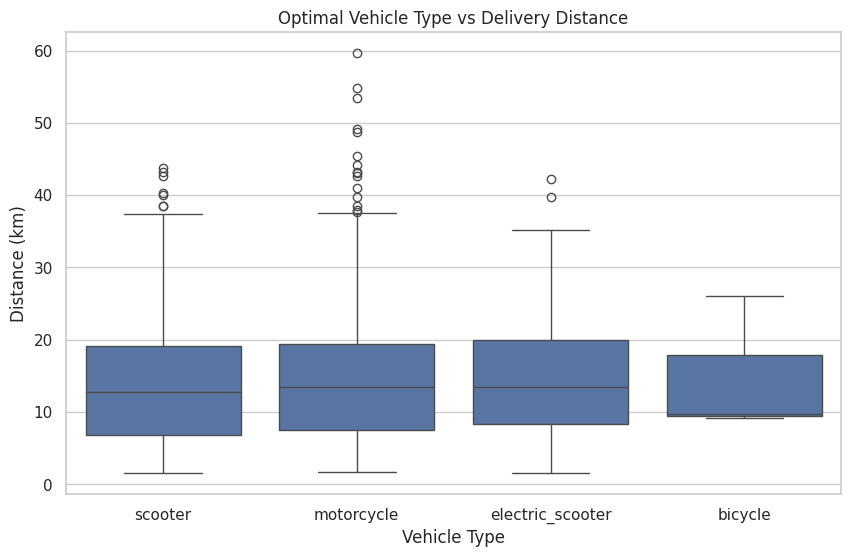

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type_of_vehicle', y='Distance (km)', data=df)
plt.title('Optimal Vehicle Type vs Delivery Distance')
plt.xlabel('Vehicle Type')
plt.ylabel('Distance (km)')
plt.show()

Insights:
Motorcycles typically handle longer distances better.
Scooters for medium-range.
Bicycles (if present) for short inner-city routes.

Step 2: Assign Riders Based on Age and Ratings

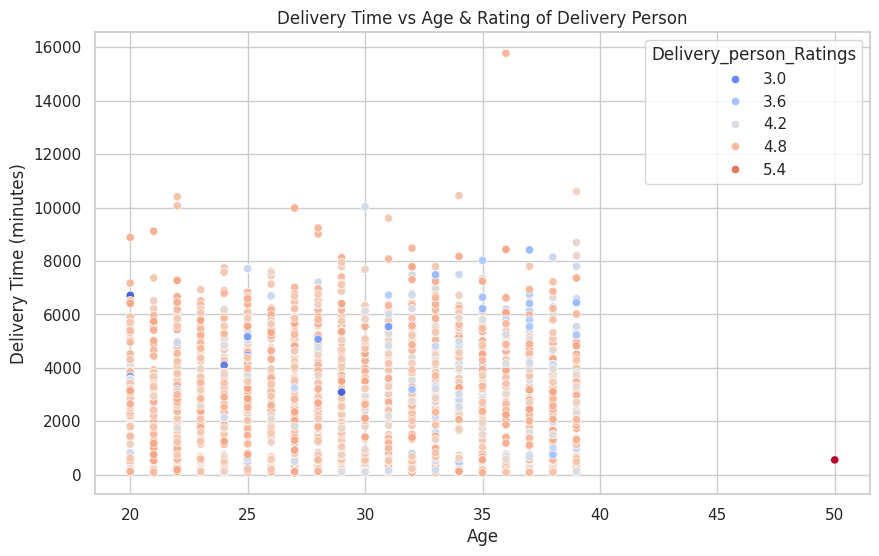

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Delivery_person_Age', y='TARGET', hue='Delivery_person_Ratings', palette='coolwarm')
plt.title('Delivery Time vs Age & Rating of Delivery Person')
plt.xlabel('Age')
plt.ylabel('Delivery Time (minutes)')
plt.show()


Insights:
Younger delivery persons (25–35) with high ratings complete faster deliveries.
Use this for urgent or high-priority orders.


Step 3: Weather-aware Scheduling

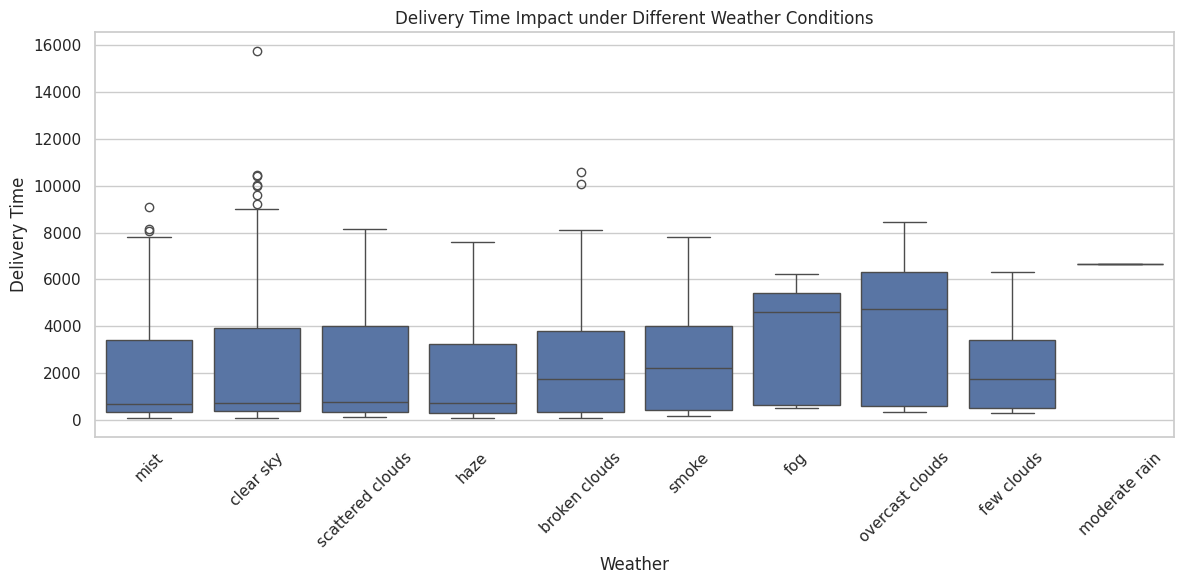

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='weather_description', y='TARGET')
plt.xticks(rotation=45)
plt.title('Delivery Time Impact under Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Delivery Time')
plt.tight_layout()
plt.show()

Operational Use:
In bad weather (mist, rain, etc.), provide extended ETAs or reduce order load.
Incentivize riders for peak weather delivery.

Step 4: Dynamic Routing During Traffic Jams

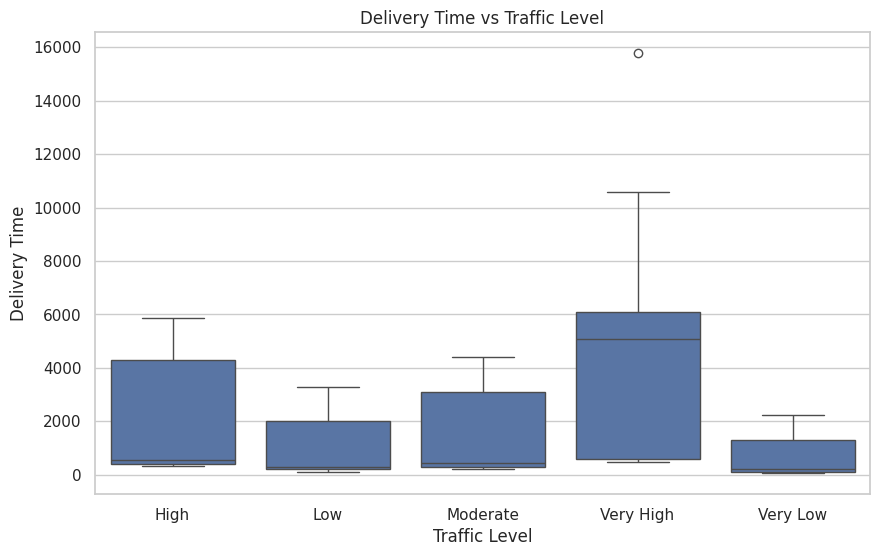

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Traffic_Level', y='TARGET')
plt.title('Delivery Time vs Traffic Level')
plt.xlabel('Traffic Level')
plt.ylabel('Delivery Time')
plt.show()


Optimization Tips:
Avoid assigning long-distance deliveries in Jam traffic.
Consider shorter radius during peak traffic.
Introduce dynamic delivery radius based on live traffic feeds.

Step 5: Fast Order Type Bundling

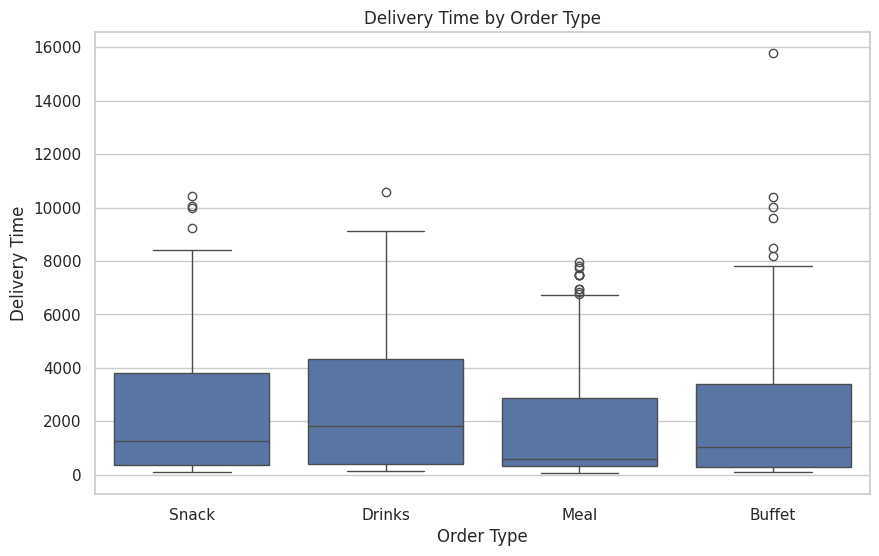

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type_of_order', y='TARGET')
plt.title('Delivery Time by Order Type')
plt.xlabel('Order Type')
plt.ylabel('Delivery Time')
plt.show()

Actionable Strategy:
Bundle Snacks/Drinks for express slots.
Assign such orders to youngest, fastest riders.
Reduce bulk order assignment in traffic/weather peaks.

Final Recommendations Summary:

|Area               | Optimization Strategy   |

|Vehicle Assignment |    Use motorcycles for >10km, scooters for mid-range      |


|Rider Assignment	  |    Prefer younger, highly-rated riders for urgent deliveries |


|Traffic Management	 |   Reduce delivery radius or switch to dense clusters during jams |


|Weather Adjustment	  |  Use incentives + notify customers of delays in bad weather |


|Order Bundling	     |    Cluster fast-moving items (Drinks/Snacks) for quick batches |